# Spatial maps of ERA-5 climatological monthly mean variables

In [1]:
import geopy.distance
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import gridspec
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns
import numpy as np
import xarray as xr
import json
import cartopy
import pandas as pd
from datetime import datetime, timedelta
import cftime
#from adjustText import adjust_text
import glob
import os

In [38]:
lonMin, lonMax = -70.1, 20.1
latMin, latMax = -12.1, 22.1

In [2]:
era5 = xr.open_dataset('/huracan/tank4/cornell/ORCESTRA/era5/ERA5_monthly_uv_1000_850_600.nc')
era5

<xarray.Dataset> Size: 3GB
Dimensions:         (valid_time: 360, pressure_level: 3, latitude: 241,
                     longitude: 1440)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 3kB 1995-01-01 ... 2024-12-01
  * pressure_level  (pressure_level) float64 24B 1e+03 850.0 600.0
  * latitude        (latitude) float64 2kB 30.0 29.75 29.5 ... -29.75 -30.0
  * longitude       (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    expver          (valid_time) <U4 6kB ...
Data variables:
    u               (valid_time, pressure_level, latitude, longitude) float32 1GB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 1GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-25T15:42 GRIB to CDM+CF via cfgrib-0.9.1...

Calculate shear

In [66]:
# calculate wind shear

# 1000 to 600 hPa [approx equivalent of 0-6 km]
era5_shear06 = np.sqrt( (era5.u.sel(pressure_level=600) - era5.u.sel(pressure_level=1000))**2 + (era5.v.sel(pressure_level=600) - era5.v.sel(pressure_level=1000))**2 )

# 1000 to 850 hPa [approx equivalent of 0-2 km]
era5_shear02 = np.sqrt( (era5.u.sel(pressure_level=850) - era5.u.sel(pressure_level=1000))**2 + (era5.v.sel(pressure_level=850) - era5.v.sel(pressure_level=1000))**2 )

Take climatological mean for each month

In [6]:
# Climo mean for each month
era5_Jan = era5.sel(valid_time = era5.valid_time[era5.valid_time.dt.month==1]).mean(dim='valid_time')
era5_Feb = era5.sel(valid_time = era5.valid_time[era5.valid_time.dt.month==2]).mean(dim='valid_time')
era5_Mar = era5.sel(valid_time = era5.valid_time[era5.valid_time.dt.month==3]).mean(dim='valid_time')
era5_Apr = era5.sel(valid_time = era5.valid_time[era5.valid_time.dt.month==4]).mean(dim='valid_time')
era5_May = era5.sel(valid_time = era5.valid_time[era5.valid_time.dt.month==5]).mean(dim='valid_time')
era5_Jun = era5.sel(valid_time = era5.valid_time[era5.valid_time.dt.month==6]).mean(dim='valid_time')
era5_Jul = era5.sel(valid_time = era5.valid_time[era5.valid_time.dt.month==7]).mean(dim='valid_time')
era5_Aug = era5.sel(valid_time = era5.valid_time[era5.valid_time.dt.month==8]).mean(dim='valid_time')
era5_Sep = era5.sel(valid_time = era5.valid_time[era5.valid_time.dt.month==9]).mean(dim='valid_time')
era5_Oct = era5.sel(valid_time = era5.valid_time[era5.valid_time.dt.month==10]).mean(dim='valid_time')
era5_Nov = era5.sel(valid_time = era5.valid_time[era5.valid_time.dt.month==11]).mean(dim='valid_time')
era5_Dec = era5.sel(valid_time = era5.valid_time[era5.valid_time.dt.month==12]).mean(dim='valid_time')

In [72]:
# Climo mean of shear
era5_shear06_Jan = era5_shear06.sel(valid_time = era5_shear06.valid_time[era5_shear06.valid_time.dt.month==1]).mean(dim='valid_time')
era5_shear06_Feb = era5_shear06.sel(valid_time = era5_shear06.valid_time[era5_shear06.valid_time.dt.month==2]).mean(dim='valid_time')
era5_shear06_Mar = era5_shear06.sel(valid_time = era5_shear06.valid_time[era5_shear06.valid_time.dt.month==3]).mean(dim='valid_time')
era5_shear06_Apr = era5_shear06.sel(valid_time = era5_shear06.valid_time[era5_shear06.valid_time.dt.month==4]).mean(dim='valid_time')
era5_shear06_May = era5_shear06.sel(valid_time = era5_shear06.valid_time[era5_shear06.valid_time.dt.month==5]).mean(dim='valid_time')
era5_shear06_Jun = era5_shear06.sel(valid_time = era5_shear06.valid_time[era5_shear06.valid_time.dt.month==6]).mean(dim='valid_time')
era5_shear06_Jul = era5_shear06.sel(valid_time = era5_shear06.valid_time[era5_shear06.valid_time.dt.month==7]).mean(dim='valid_time')
era5_shear06_Aug = era5_shear06.sel(valid_time = era5_shear06.valid_time[era5_shear06.valid_time.dt.month==8]).mean(dim='valid_time')
era5_shear06_Sep = era5_shear06.sel(valid_time = era5_shear06.valid_time[era5_shear06.valid_time.dt.month==9]).mean(dim='valid_time')
era5_shear06_Oct = era5_shear06.sel(valid_time = era5_shear06.valid_time[era5_shear06.valid_time.dt.month==10]).mean(dim='valid_time')
era5_shear06_Nov = era5_shear06.sel(valid_time = era5_shear06.valid_time[era5_shear06.valid_time.dt.month==11]).mean(dim='valid_time')
era5_shear06_Dec = era5_shear06.sel(valid_time = era5_shear06.valid_time[era5_shear06.valid_time.dt.month==12]).mean(dim='valid_time')

era5_shear02_Jan = era5_shear02.sel(valid_time = era5_shear02.valid_time[era5_shear02.valid_time.dt.month==1]).mean(dim='valid_time')
era5_shear02_Feb = era5_shear02.sel(valid_time = era5_shear02.valid_time[era5_shear02.valid_time.dt.month==2]).mean(dim='valid_time')
era5_shear02_Mar = era5_shear02.sel(valid_time = era5_shear02.valid_time[era5_shear02.valid_time.dt.month==3]).mean(dim='valid_time')
era5_shear02_Apr = era5_shear02.sel(valid_time = era5_shear02.valid_time[era5_shear02.valid_time.dt.month==4]).mean(dim='valid_time')
era5_shear02_May = era5_shear02.sel(valid_time = era5_shear02.valid_time[era5_shear02.valid_time.dt.month==5]).mean(dim='valid_time')
era5_shear02_Jun = era5_shear02.sel(valid_time = era5_shear02.valid_time[era5_shear02.valid_time.dt.month==6]).mean(dim='valid_time')
era5_shear02_Jul = era5_shear02.sel(valid_time = era5_shear02.valid_time[era5_shear02.valid_time.dt.month==7]).mean(dim='valid_time')
era5_shear02_Aug = era5_shear02.sel(valid_time = era5_shear02.valid_time[era5_shear02.valid_time.dt.month==8]).mean(dim='valid_time')
era5_shear02_Sep = era5_shear02.sel(valid_time = era5_shear02.valid_time[era5_shear02.valid_time.dt.month==9]).mean(dim='valid_time')
era5_shear02_Oct = era5_shear02.sel(valid_time = era5_shear02.valid_time[era5_shear02.valid_time.dt.month==10]).mean(dim='valid_time')
era5_shear02_Nov = era5_shear02.sel(valid_time = era5_shear02.valid_time[era5_shear02.valid_time.dt.month==11]).mean(dim='valid_time')
era5_shear02_Dec = era5_shear02.sel(valid_time = era5_shear02.valid_time[era5_shear02.valid_time.dt.month==12]).mean(dim='valid_time')

In [7]:
#Concatenate into one dataset
era5_monthly_climo = xr.concat([era5_Jan, era5_Feb, era5_Mar, era5_Apr, era5_May, era5_Jun, 
                               era5_Jul, era5_Aug, era5_Sep, era5_Oct, era5_Nov, era5_Dec], 
                              dim='month')
era5_monthly_climo['month'] = np.arange(1,13)
era5_monthly_climo

<xarray.Dataset> Size: 100MB
Dimensions:         (month: 12, pressure_level: 3, latitude: 241,
                     longitude: 1440)
Coordinates:
    number          int64 8B 0
  * pressure_level  (pressure_level) float64 24B 1e+03 850.0 600.0
  * latitude        (latitude) float64 2kB 30.0 29.75 29.5 ... -29.75 -30.0
  * longitude       (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
  * month           (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    u               (month, pressure_level, latitude, longitude) float32 50MB ...
    v               (month, pressure_level, latitude, longitude) float32 50MB ...

In [73]:
era5_shear06_climo = xr.concat([era5_shear06_Jan, era5_shear06_Feb, era5_shear06_Mar, era5_shear06_Apr, era5_shear06_May, era5_shear06_Jun, 
                               era5_shear06_Jul, era5_shear06_Aug, era5_shear06_Sep, era5_shear06_Oct, era5_shear06_Nov, era5_shear06_Dec], 
                              dim='month')
era5_shear06_climo['month'] = np.arange(1,13)

era5_shear02_climo = xr.concat([era5_shear02_Jan, era5_shear02_Feb, era5_shear02_Mar, era5_shear02_Apr, era5_shear02_May, era5_shear02_Jun, 
                               era5_shear02_Jul, era5_shear02_Aug, era5_shear02_Sep, era5_shear02_Oct, era5_shear02_Nov, era5_shear02_Dec], 
                              dim='month')
era5_shear02_climo['month'] = np.arange(1,13)

Plot shear

Processing month: 1
Processing month: 2
Processing month: 3
2
Processing month: 4
Processing month: 5
Processing month: 6
5
Processing month: 7
Processing month: 8
Processing month: 9
8
Processing month: 10
9
Processing month: 11
10
Processing month: 12
11
11


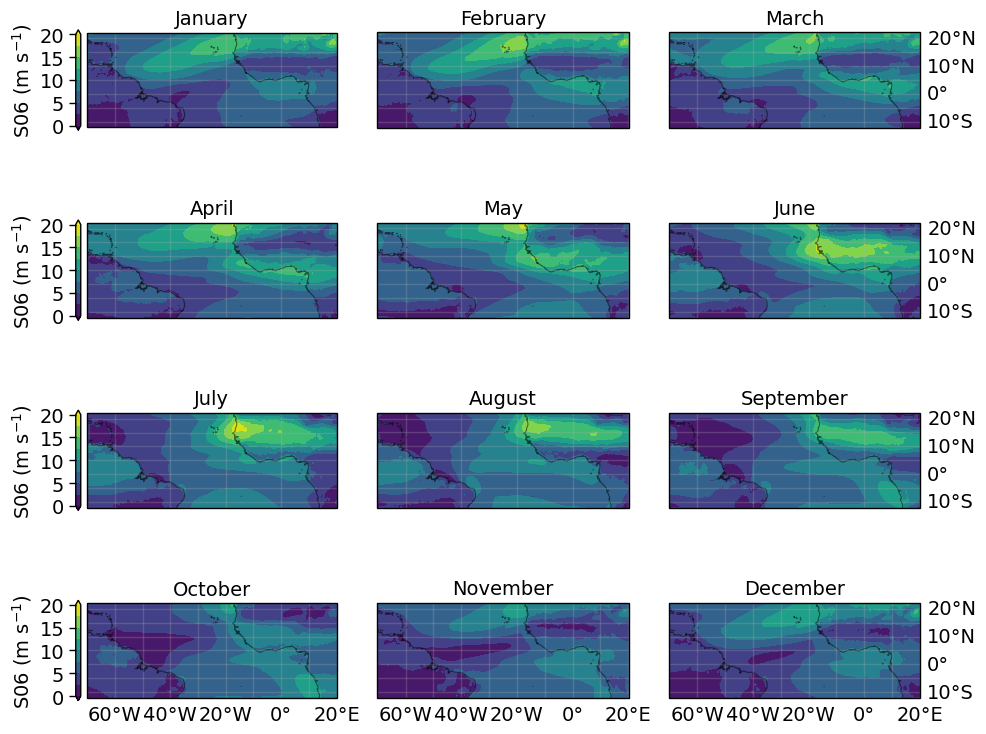

In [69]:
# For each month, spatial plot

fig = plt.figure(figsize = (10, 8))
gs = gridspec.GridSpec(4, 3, width_ratios=[1.2, 1, 1])

months = np.arange(1,13)  # 1-12
imonth = 0
for mm in months:
    # print month
    print("Processing month:", mm)
       
    # Create plot
    ax1 = fig.add_subplot(gs[imonth],projection=ccrs.PlateCarree())
    ax1.coastlines(resolution = '50m',alpha=0.5)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1,alpha = 0.25)
    gl.top_labels = False
    gl.left_labels = False
    if imonth==9 or imonth==10 or imonth==11:
        print(imonth)    
        gl.xlocator = mticker.FixedLocator([-60, -50, -40, -30, -20, -10, 0, 10, 20])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.xlabel_style = {'size': 14}
    else: 
        gl.bottom_labels = False
    if imonth==2 or imonth==5 or imonth==8 or imonth==11:
        print(imonth)
        gl.ylocator = mticker.FixedLocator([-10, -5,0, 5, 10, 15, 20])
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylabel_style = {'size': 14}
    else:
        gl.right_labels = False
    
    # Plot  filled contours
    plt.contourf(era5_shear06_climo.sel(month=mm).longitude.values, 
                 era5_shear06_climo.sel(month=mm).latitude.values,
                 era5_shear06_climo.sel(month=mm).values,
                 cmap = 'viridis', levels=np.arange(0,22.5,2.5),extend='both')
    
    if imonth==0 or imonth==3 or imonth==6 or imonth==9:
        cbar=plt.colorbar(location='left',orientation='vertical',shrink = 0.5, pad=0.02)
        cbar.set_label('S06 (m s$^{-1}$)',fontsize=14)
        cbar.set_ticks(np.arange(0, 25, 5))
        cbar.set_ticklabels([f'{x:.0f}' for x in np.arange(0, 25, 5)],fontsize=14)

    # Set the plot limits and title
    if mm == 1:
        ax1.set_title('January',size=14)
    elif mm == 2:
        ax1.set_title('February',size=14)
    elif mm == 3:
        ax1.set_title('March',size=14)
    elif mm == 4:
        ax1.set_title('April',size=14)
    elif mm == 5:   
        ax1.set_title('May',size=14)
    elif mm == 6:
        ax1.set_title('June',size=14)
    elif mm == 7:
        ax1.set_title('July',size=14)
    elif mm == 8:
        ax1.set_title('August',size=14)
    elif mm == 9:   
        ax1.set_title('September',size=14)
    elif mm == 10:
        ax1.set_title('October',size=14)
    elif mm == 11:
        ax1.set_title('November',size=14)
    else:
        ax1.set_title('December',size=14)
        
    ax1.set_xlim(lonMin, lonMax)
    ax1.set_ylim(latMin, latMax)
    
    imonth=imonth+1
    
sns.set_context('paper') 
plt.tight_layout()  # Adjust subplots to fit into figure area.

Processing month: 1
Processing month: 2
Processing month: 3
2
Processing month: 4
Processing month: 5
Processing month: 6
5
Processing month: 7
Processing month: 8
Processing month: 9
8
Processing month: 10
9
Processing month: 11
10
Processing month: 12
11
11


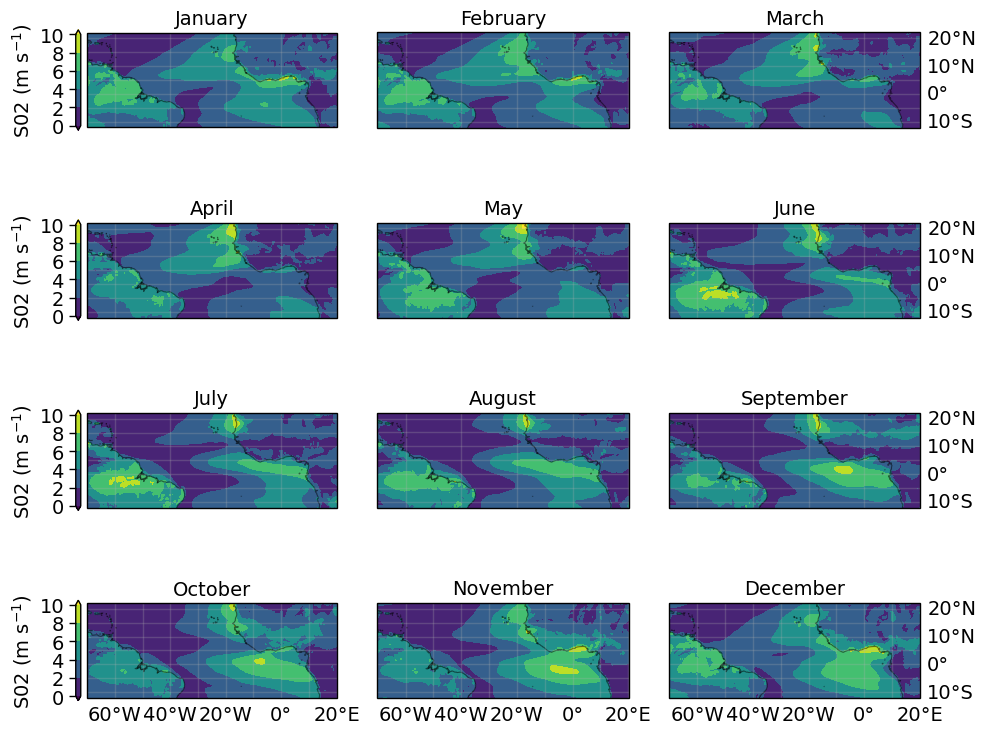

In [74]:
# For each month, spatial plot

fig = plt.figure(figsize = (10, 8))
gs = gridspec.GridSpec(4, 3, width_ratios=[1.2, 1, 1])

months = np.arange(1,13)  # 1-12
imonth = 0
for mm in months:
    # print month
    print("Processing month:", mm)
       
    # Create plot
    ax1 = fig.add_subplot(gs[imonth],projection=ccrs.PlateCarree())
    ax1.coastlines(resolution = '50m',alpha=0.5)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1,alpha = 0.25)
    gl.top_labels = False
    gl.left_labels = False
    if imonth==9 or imonth==10 or imonth==11:
        print(imonth)    
        gl.xlocator = mticker.FixedLocator([-60, -50, -40, -30, -20, -10, 0, 10, 20])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.xlabel_style = {'size': 14}
    else: 
        gl.bottom_labels = False
    if imonth==2 or imonth==5 or imonth==8 or imonth==11:
        print(imonth)
        gl.ylocator = mticker.FixedLocator([-10, -5,0, 5, 10, 15, 20])
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylabel_style = {'size': 14}
    else:
        gl.right_labels = False
    
    # Plot  filled contours
    plt.contourf(era5_shear02_climo.sel(month=mm).longitude.values, 
                 era5_shear02_climo.sel(month=mm).latitude.values,
                 era5_shear02_climo.sel(month=mm).values,
                 cmap = 'viridis', levels=np.arange(0,12,2),extend='both')
    
    if imonth==0 or imonth==3 or imonth==6 or imonth==9:
        cbar=plt.colorbar(location='left',orientation='vertical',shrink = 0.5, pad=0.02)
        cbar.set_label('S02 (m s$^{-1}$)',fontsize=14)
        cbar.set_ticks(np.arange(0, 12, 2))
        cbar.set_ticklabels([f'{x:.0f}' for x in np.arange(0, 12, 2)],fontsize=14)

    # Set the plot limits and title
    if mm == 1:
        ax1.set_title('January',size=14)
    elif mm == 2:
        ax1.set_title('February',size=14)
    elif mm == 3:
        ax1.set_title('March',size=14)
    elif mm == 4:
        ax1.set_title('April',size=14)
    elif mm == 5:   
        ax1.set_title('May',size=14)
    elif mm == 6:
        ax1.set_title('June',size=14)
    elif mm == 7:
        ax1.set_title('July',size=14)
    elif mm == 8:
        ax1.set_title('August',size=14)
    elif mm == 9:   
        ax1.set_title('September',size=14)
    elif mm == 10:
        ax1.set_title('October',size=14)
    elif mm == 11:
        ax1.set_title('November',size=14)
    else:
        ax1.set_title('December',size=14)
        
    ax1.set_xlim(lonMin, lonMax)
    ax1.set_ylim(latMin, latMax)
    
    imonth=imonth+1
    
sns.set_context('paper') 
plt.tight_layout()  # Adjust subplots to fit into figure area.

Plot zonal winds

Processing month: 1
Processing month: 2
Processing month: 3
2
Processing month: 4
Processing month: 5
Processing month: 6
5
Processing month: 7
Processing month: 8
Processing month: 9
8
Processing month: 10
9
Processing month: 11
10
Processing month: 12
11
11


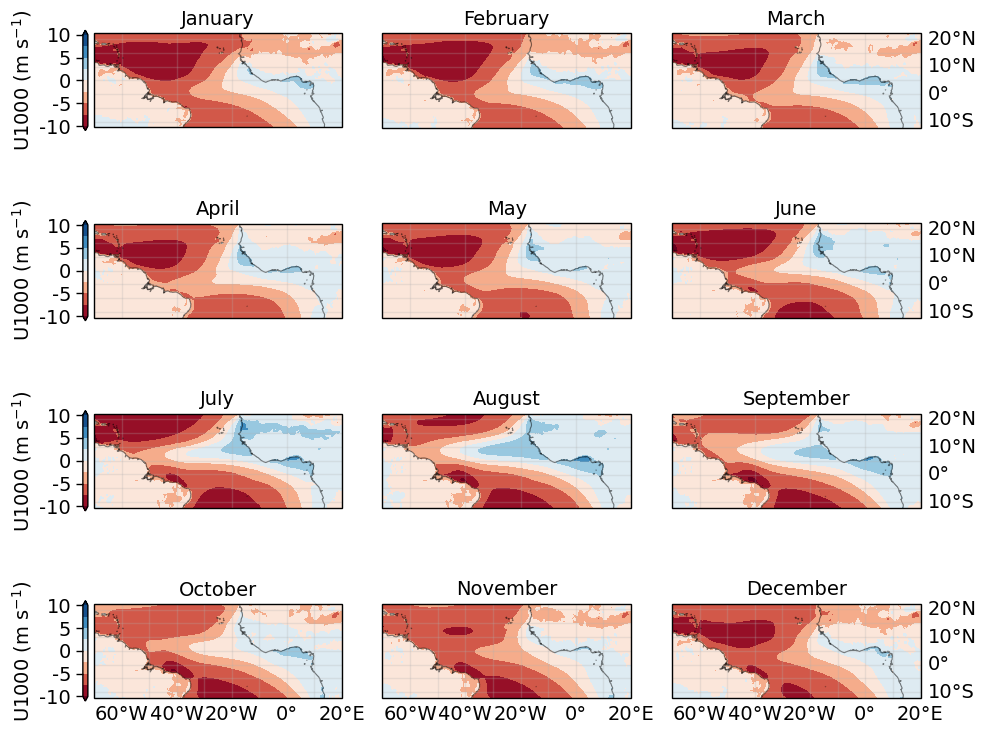

In [49]:
# For each month, spatial plot

fig = plt.figure(figsize = (10, 8))
gs = gridspec.GridSpec(4, 3, width_ratios=[1.2, 1, 1])

months = np.arange(1,13)  # 1-12
imonth = 0
for mm in months:
    # print month
    print("Processing month:", mm)
       
    # Create plot
    ax1 = fig.add_subplot(gs[imonth],projection=ccrs.PlateCarree())
    ax1.coastlines(resolution = '50m',alpha=0.5)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1,alpha = 0.25)
    gl.top_labels = False
    gl.left_labels = False
    if imonth==9 or imonth==10 or imonth==11:
        print(imonth)    
        gl.xlocator = mticker.FixedLocator([-60, -50, -40, -30, -20, -10, 0, 10, 20])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.xlabel_style = {'size': 14}
    else: 
        gl.bottom_labels = False
    if imonth==2 or imonth==5 or imonth==8 or imonth==11:
        print(imonth)
        gl.ylocator = mticker.FixedLocator([-10, -5,0, 5, 10, 15, 20])
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylabel_style = {'size': 14}
    else:
        gl.right_labels = False
    
    # Plot  filled contours
    plt.contourf(era5_monthly_climo.sel(month=mm).longitude.values, 
                 era5_monthly_climo.sel(month=mm).latitude.values,
                 era5_monthly_climo.u.sel(month=mm, pressure_level=1000).values,
                 cmap = 'RdBu', levels = np.arange(-10,12.5,2.5), extend='both')
    
    if imonth==0 or imonth==3 or imonth==6 or imonth==9:
        cbar=plt.colorbar(location='left',orientation='vertical',shrink = 0.5, pad=0.02)
        cbar.set_label('U1000 (m s$^{-1}$)',fontsize=14)
        cbar.set_ticks(np.arange(-10, 15, 5))
        cbar.set_ticklabels([f'{x:.0f}' for x in np.arange(-10, 15, 5)],fontsize=14)

    # Set the plot limits and title
    if mm == 1:
        ax1.set_title('January',size=14)
    elif mm == 2:
        ax1.set_title('February',size=14)
    elif mm == 3:
        ax1.set_title('March',size=14)
    elif mm == 4:
        ax1.set_title('April',size=14)
    elif mm == 5:   
        ax1.set_title('May',size=14)
    elif mm == 6:
        ax1.set_title('June',size=14)
    elif mm == 7:
        ax1.set_title('July',size=14)
    elif mm == 8:
        ax1.set_title('August',size=14)
    elif mm == 9:   
        ax1.set_title('September',size=14)
    elif mm == 10:
        ax1.set_title('October',size=14)
    elif mm == 11:
        ax1.set_title('November',size=14)
    else:
        ax1.set_title('December',size=14)
        
    ax1.set_xlim(lonMin, lonMax)
    ax1.set_ylim(latMin, latMax)
    
    imonth=imonth+1
    
sns.set_context('paper') 
plt.tight_layout()  # Adjust subplots to fit into figure area.

Processing month: 1
Processing month: 2
Processing month: 3
2
Processing month: 4
Processing month: 5
Processing month: 6
5
Processing month: 7
Processing month: 8
Processing month: 9
8
Processing month: 10
9
Processing month: 11
10
Processing month: 12
11
11


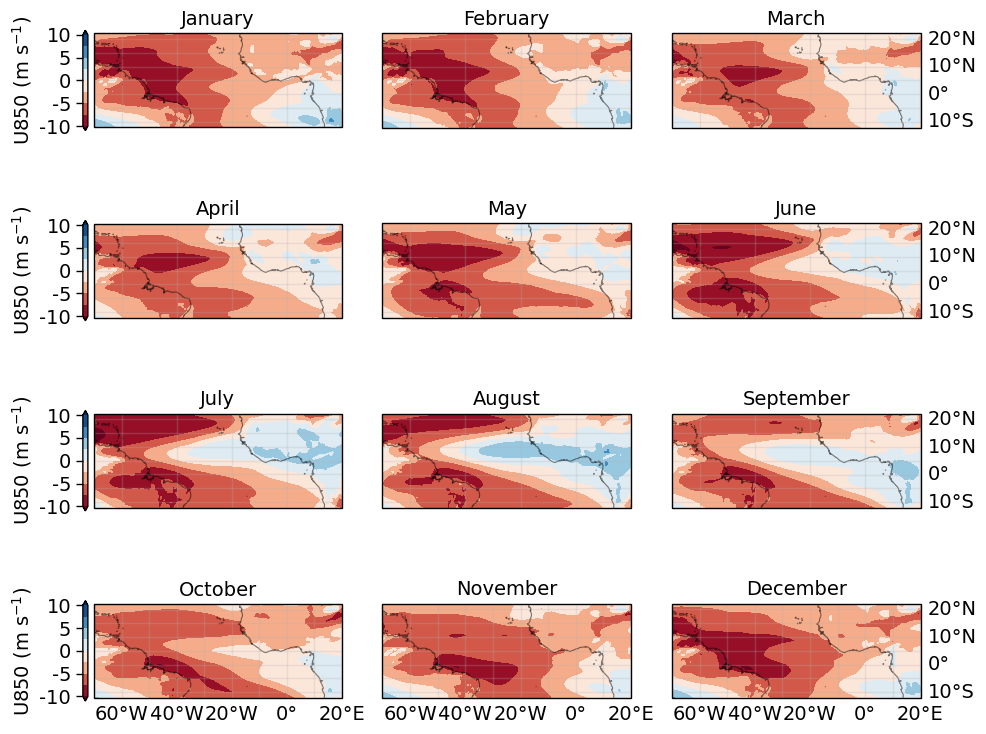

In [47]:
# For each month, spatial plot

fig = plt.figure(figsize = (10, 8))
gs = gridspec.GridSpec(4, 3, width_ratios=[1.2, 1, 1])

months = np.arange(1,13)  # 1-12
imonth = 0
for mm in months:
    # print month
    print("Processing month:", mm)
       
    # Create plot
    ax1 = fig.add_subplot(gs[imonth],projection=ccrs.PlateCarree())
    ax1.coastlines(resolution = '50m',alpha=0.5)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1,alpha = 0.25)
    gl.top_labels = False
    gl.left_labels = False
    if imonth==9 or imonth==10 or imonth==11:
        print(imonth)    
        gl.xlocator = mticker.FixedLocator([-60, -50, -40, -30, -20, -10, 0, 10, 20])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.xlabel_style = {'size': 14}
    else: 
        gl.bottom_labels = False
    if imonth==2 or imonth==5 or imonth==8 or imonth==11:
        print(imonth)
        gl.ylocator = mticker.FixedLocator([-10, -5,0, 5, 10, 15, 20])
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylabel_style = {'size': 14}
    else:
        gl.right_labels = False
    
    # Plot  filled contours
    plt.contourf(era5_monthly_climo.sel(month=mm).longitude.values, 
                 era5_monthly_climo.sel(month=mm).latitude.values,
                 era5_monthly_climo.u.sel(month=mm, pressure_level=850).values,
                 cmap = 'RdBu', levels = np.arange(-10,12.5,2.5), extend='both')
    
    if imonth==0 or imonth==3 or imonth==6 or imonth==9:
        cbar=plt.colorbar(location='left',orientation='vertical',shrink = 0.5, pad=0.02)
        cbar.set_label('U850 (m s$^{-1}$)',fontsize=14)
        cbar.set_ticks(np.arange(-10, 15, 5))
        cbar.set_ticklabels([f'{x:.0f}' for x in np.arange(-10, 15, 5)],fontsize=14)

    # Set the plot limits and title
    if mm == 1:
        ax1.set_title('January',size=14)
    elif mm == 2:
        ax1.set_title('February',size=14)
    elif mm == 3:
        ax1.set_title('March',size=14)
    elif mm == 4:
        ax1.set_title('April',size=14)
    elif mm == 5:   
        ax1.set_title('May',size=14)
    elif mm == 6:
        ax1.set_title('June',size=14)
    elif mm == 7:
        ax1.set_title('July',size=14)
    elif mm == 8:
        ax1.set_title('August',size=14)
    elif mm == 9:   
        ax1.set_title('September',size=14)
    elif mm == 10:
        ax1.set_title('October',size=14)
    elif mm == 11:
        ax1.set_title('November',size=14)
    else:
        ax1.set_title('December',size=14)
        
    ax1.set_xlim(lonMin, lonMax)
    ax1.set_ylim(latMin, latMax)
    
    imonth=imonth+1
    
sns.set_context('paper') 
plt.tight_layout()  # Adjust subplots to fit into figure area.

Processing month: 1
Processing month: 2
Processing month: 3
2
Processing month: 4
Processing month: 5
Processing month: 6
5
Processing month: 7
Processing month: 8
Processing month: 9
8
Processing month: 10
9
Processing month: 11
10
Processing month: 12
11
11


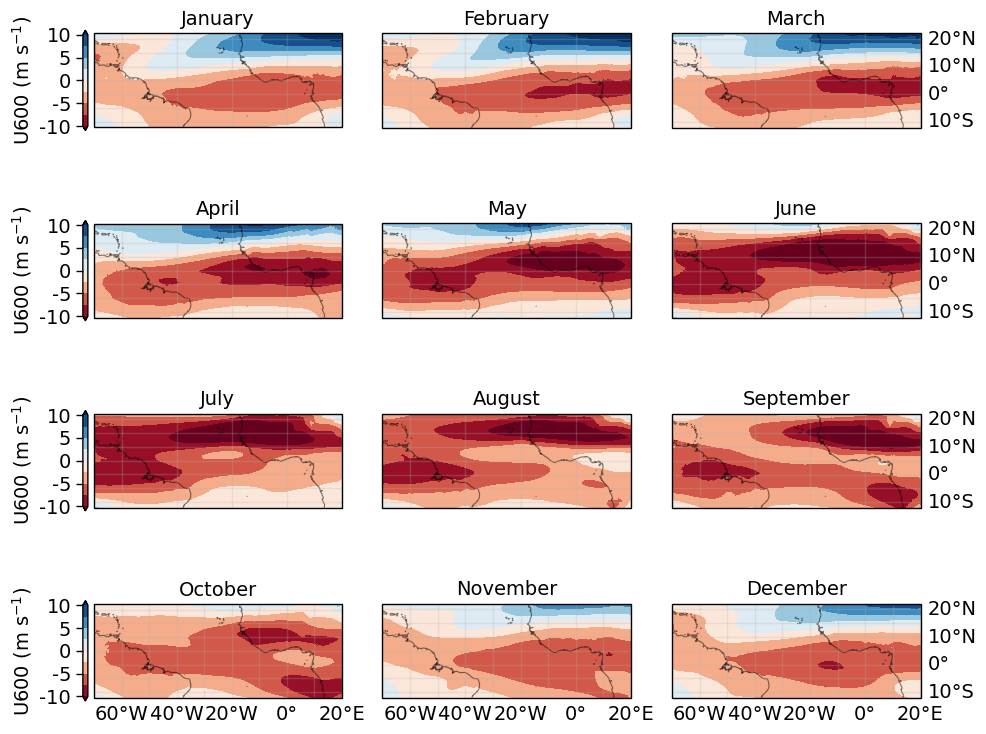

In [48]:
# For each month, spatial plot

fig = plt.figure(figsize = (10, 8))
gs = gridspec.GridSpec(4, 3, width_ratios=[1.2, 1, 1])

months = np.arange(1,13)  # 1-12
imonth = 0
for mm in months:
    # print month
    print("Processing month:", mm)
       
    # Create plot
    ax1 = fig.add_subplot(gs[imonth],projection=ccrs.PlateCarree())
    ax1.coastlines(resolution = '50m',alpha=0.5)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1,alpha = 0.25)
    gl.top_labels = False
    gl.left_labels = False
    if imonth==9 or imonth==10 or imonth==11:
        print(imonth)    
        gl.xlocator = mticker.FixedLocator([-60, -50, -40, -30, -20, -10, 0, 10, 20])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.xlabel_style = {'size': 14}
    else: 
        gl.bottom_labels = False
    if imonth==2 or imonth==5 or imonth==8 or imonth==11:
        print(imonth)
        gl.ylocator = mticker.FixedLocator([-10, -5,0, 5, 10, 15, 20])
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylabel_style = {'size': 14}
    else:
        gl.right_labels = False
    
    # Plot  filled contours
    plt.contourf(era5_monthly_climo.sel(month=mm).longitude.values, 
                 era5_monthly_climo.sel(month=mm).latitude.values,
                 era5_monthly_climo.u.sel(month=mm, pressure_level=600).values,
                 cmap = 'RdBu', levels = np.arange(-10,12.5,2.5), extend='both')
    
    if imonth==0 or imonth==3 or imonth==6 or imonth==9:
        cbar=plt.colorbar(location='left',orientation='vertical',shrink = 0.5, pad=0.02)
        cbar.set_label('U600 (m s$^{-1}$)',fontsize=14)
        cbar.set_ticks(np.arange(-10, 15, 5))
        cbar.set_ticklabels([f'{x:.0f}' for x in np.arange(-10, 15, 5)],fontsize=14)

    # Set the plot limits and title
    if mm == 1:
        ax1.set_title('January',size=14)
    elif mm == 2:
        ax1.set_title('February',size=14)
    elif mm == 3:
        ax1.set_title('March',size=14)
    elif mm == 4:
        ax1.set_title('April',size=14)
    elif mm == 5:   
        ax1.set_title('May',size=14)
    elif mm == 6:
        ax1.set_title('June',size=14)
    elif mm == 7:
        ax1.set_title('July',size=14)
    elif mm == 8:
        ax1.set_title('August',size=14)
    elif mm == 9:   
        ax1.set_title('September',size=14)
    elif mm == 10:
        ax1.set_title('October',size=14)
    elif mm == 11:
        ax1.set_title('November',size=14)
    else:
        ax1.set_title('December',size=14)
        
    ax1.set_xlim(lonMin, lonMax)
    ax1.set_ylim(latMin, latMax)
    
    imonth=imonth+1
    
sns.set_context('paper') 
plt.tight_layout()  # Adjust subplots to fit into figure area.

 Plot meridional winds

Processing month: 1
Processing month: 2
Processing month: 3
2
Processing month: 4
Processing month: 5
Processing month: 6
5
Processing month: 7
Processing month: 8
Processing month: 9
8
Processing month: 10
9
Processing month: 11
10
Processing month: 12
11
11


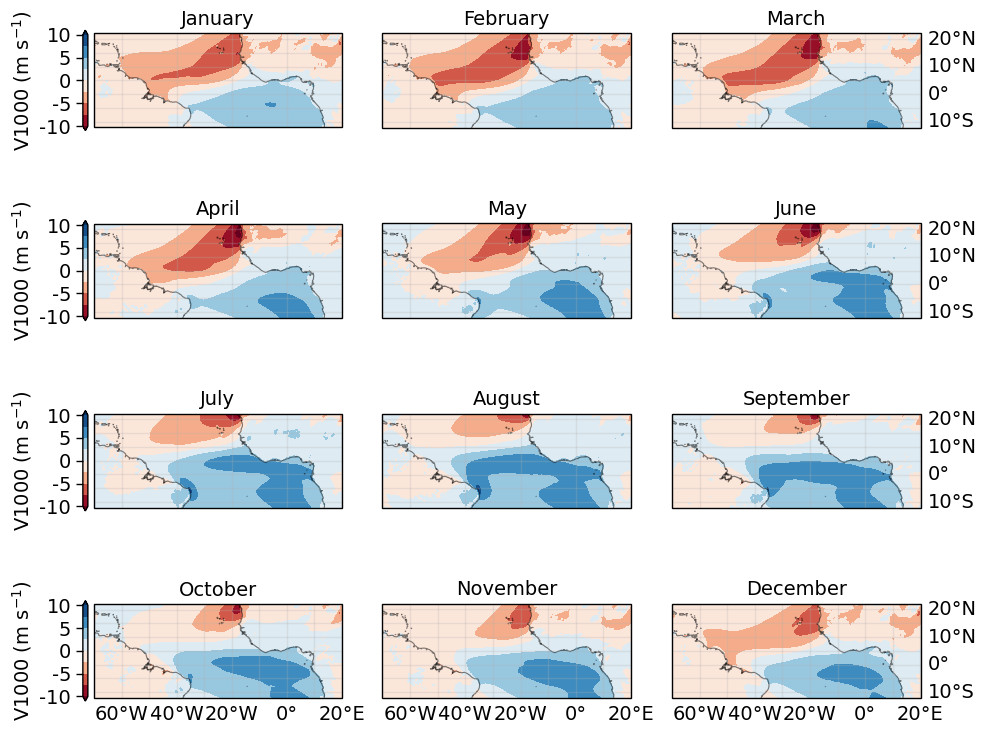

In [57]:
# For each month, spatial plot

fig = plt.figure(figsize = (10, 8))
gs = gridspec.GridSpec(4, 3, width_ratios=[1.2, 1, 1])

months = np.arange(1,13)  # 1-12
imonth = 0
for mm in months:
    # print month
    print("Processing month:", mm)
       
    # Create plot
    ax1 = fig.add_subplot(gs[imonth],projection=ccrs.PlateCarree())
    ax1.coastlines(resolution = '50m',alpha=0.5)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1,alpha = 0.25)
    gl.top_labels = False
    gl.left_labels = False
    if imonth==9 or imonth==10 or imonth==11:
        print(imonth)    
        gl.xlocator = mticker.FixedLocator([-60, -50, -40, -30, -20, -10, 0, 10, 20])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.xlabel_style = {'size': 14}
    else: 
        gl.bottom_labels = False
    if imonth==2 or imonth==5 or imonth==8 or imonth==11:
        print(imonth)
        gl.ylocator = mticker.FixedLocator([-10, -5,0, 5, 10, 15, 20])
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylabel_style = {'size': 14}
    else:
        gl.right_labels = False
    
    # Plot  filled contours
    plt.contourf(era5_monthly_climo.sel(month=mm).longitude.values, 
                 era5_monthly_climo.sel(month=mm).latitude.values,
                 era5_monthly_climo.v.sel(month=mm, pressure_level=1000).values,
                 cmap = 'RdBu', levels = np.arange(-10,12.5,2.5), extend='both')
    
    if imonth==0 or imonth==3 or imonth==6 or imonth==9:
        cbar=plt.colorbar(location='left',orientation='vertical',shrink = 0.5, pad=0.02)
        cbar.set_label('V1000 (m s$^{-1}$)',fontsize=14)
        cbar.set_ticks(np.arange(-10, 15, 5))
        cbar.set_ticklabels([f'{x:.0f}' for x in np.arange(-10, 15, 5)],fontsize=14)

    # Set the plot limits and title
    if mm == 1:
        ax1.set_title('January',size=14)
    elif mm == 2:
        ax1.set_title('February',size=14)
    elif mm == 3:
        ax1.set_title('March',size=14)
    elif mm == 4:
        ax1.set_title('April',size=14)
    elif mm == 5:   
        ax1.set_title('May',size=14)
    elif mm == 6:
        ax1.set_title('June',size=14)
    elif mm == 7:
        ax1.set_title('July',size=14)
    elif mm == 8:
        ax1.set_title('August',size=14)
    elif mm == 9:   
        ax1.set_title('September',size=14)
    elif mm == 10:
        ax1.set_title('October',size=14)
    elif mm == 11:
        ax1.set_title('November',size=14)
    else:
        ax1.set_title('December',size=14)
        
    ax1.set_xlim(lonMin, lonMax)
    ax1.set_ylim(latMin, latMax)
    
    imonth=imonth+1
    
sns.set_context('paper') 
plt.tight_layout()  # Adjust subplots to fit into figure area.

Processing month: 1
Processing month: 2


Processing month: 3
2
Processing month: 4
Processing month: 5
Processing month: 6
5
Processing month: 7
Processing month: 8
Processing month: 9
8
Processing month: 10
9
Processing month: 11
10
Processing month: 12
11
11


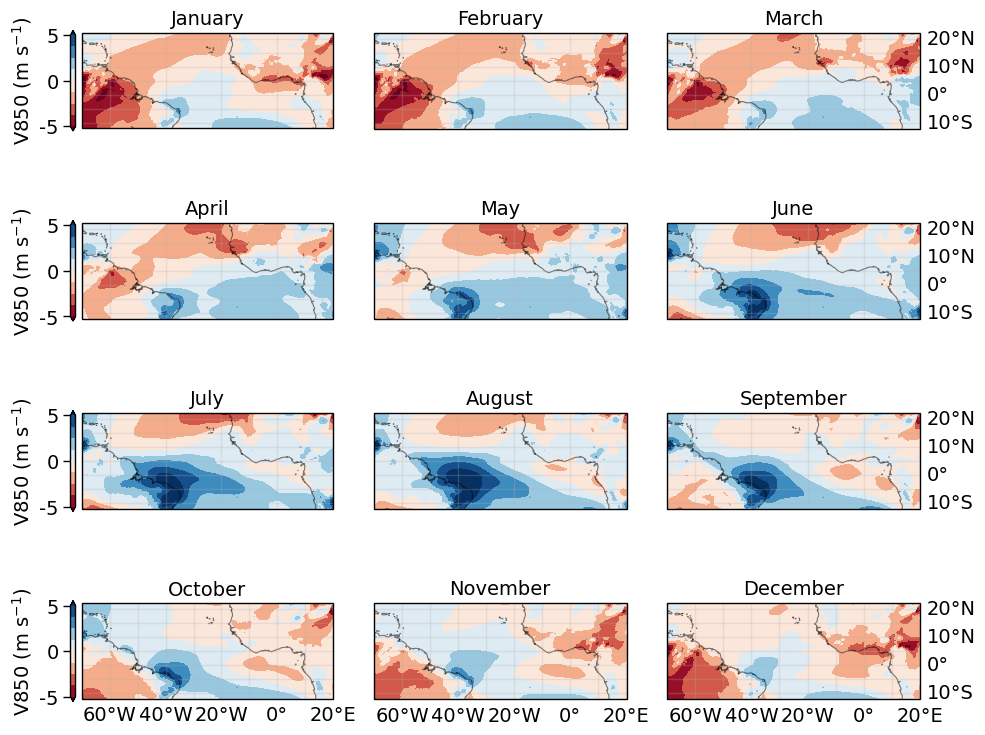

In [63]:
# For each month, spatial plot

fig = plt.figure(figsize = (10, 8))
gs = gridspec.GridSpec(4, 3, width_ratios=[1.2, 1, 1])

months = np.arange(1,13)  # 1-12
imonth = 0
for mm in months:
    # print month
    print("Processing month:", mm)
       
    # Create plot
    ax1 = fig.add_subplot(gs[imonth],projection=ccrs.PlateCarree())
    ax1.coastlines(resolution = '50m',alpha=0.5)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1,alpha = 0.25)
    gl.top_labels = False
    gl.left_labels = False
    if imonth==9 or imonth==10 or imonth==11:
        print(imonth)    
        gl.xlocator = mticker.FixedLocator([-60, -50, -40, -30, -20, -10, 0, 10, 20])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.xlabel_style = {'size': 14}
    else: 
        gl.bottom_labels = False
    if imonth==2 or imonth==5 or imonth==8 or imonth==11:
        print(imonth)
        gl.ylocator = mticker.FixedLocator([-10, -5,0, 5, 10, 15, 20])
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylabel_style = {'size': 14}
    else:
        gl.right_labels = False
    
    # Plot  filled contours
    plt.contourf(era5_monthly_climo.sel(month=mm).longitude.values, 
                 era5_monthly_climo.sel(month=mm).latitude.values,
                 era5_monthly_climo.v.sel(month=mm, pressure_level=850).values,
                 cmap = 'RdBu', levels = np.arange(-5,6.25,1.25), extend='both')
    
    if imonth==0 or imonth==3 or imonth==6 or imonth==9:
        cbar=plt.colorbar(location='left',orientation='vertical',shrink = 0.5, pad=0.02)
        cbar.set_label('V850 (m s$^{-1}$)',fontsize=14)
        cbar.set_ticks(np.arange(-5, 10, 5))
        cbar.set_ticklabels([f'{x:.0f}' for x in np.arange(-5, 10, 5)],fontsize=14)

    # Set the plot limits and title
    if mm == 1:
        ax1.set_title('January',size=14)
    elif mm == 2:
        ax1.set_title('February',size=14)
    elif mm == 3:
        ax1.set_title('March',size=14)
    elif mm == 4:
        ax1.set_title('April',size=14)
    elif mm == 5:   
        ax1.set_title('May',size=14)
    elif mm == 6:
        ax1.set_title('June',size=14)
    elif mm == 7:
        ax1.set_title('July',size=14)
    elif mm == 8:
        ax1.set_title('August',size=14)
    elif mm == 9:   
        ax1.set_title('September',size=14)
    elif mm == 10:
        ax1.set_title('October',size=14)
    elif mm == 11:
        ax1.set_title('November',size=14)
    else:
        ax1.set_title('December',size=14)
        
    ax1.set_xlim(lonMin, lonMax)
    ax1.set_ylim(latMin, latMax)
    
    imonth=imonth+1
    
sns.set_context('paper') 
plt.tight_layout()  # Adjust subplots to fit into figure area.

Processing month: 1
Processing month: 2
Processing month: 3
2
Processing month: 4
Processing month: 5
Processing month: 6
5
Processing month: 7
Processing month: 8
Processing month: 9
8
Processing month: 10
9
Processing month: 11
10
Processing month: 12
11
11


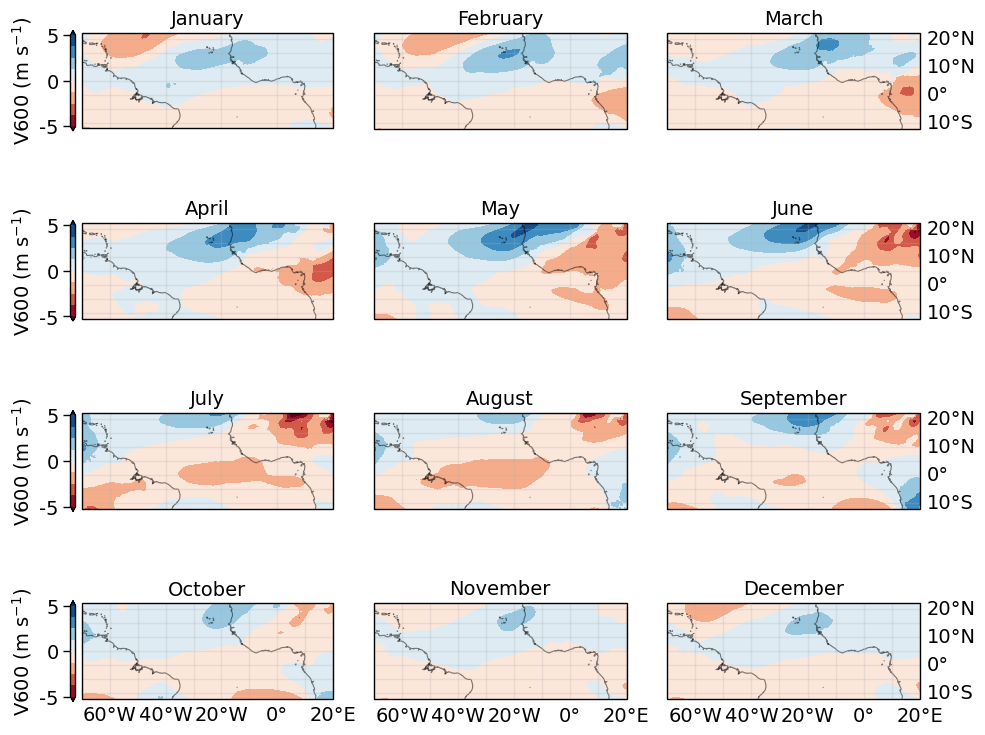

In [62]:
# For each month, spatial plot

fig = plt.figure(figsize = (10, 8))
gs = gridspec.GridSpec(4, 3, width_ratios=[1.2, 1, 1])

months = np.arange(1,13)  # 1-12
imonth = 0
for mm in months:
    # print month
    print("Processing month:", mm)
       
    # Create plot
    ax1 = fig.add_subplot(gs[imonth],projection=ccrs.PlateCarree())
    ax1.coastlines(resolution = '50m',alpha=0.5)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1,alpha = 0.25)
    gl.top_labels = False
    gl.left_labels = False
    if imonth==9 or imonth==10 or imonth==11:
        print(imonth)    
        gl.xlocator = mticker.FixedLocator([-60, -50, -40, -30, -20, -10, 0, 10, 20])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.xlabel_style = {'size': 14}
    else: 
        gl.bottom_labels = False
    if imonth==2 or imonth==5 or imonth==8 or imonth==11:
        print(imonth)
        gl.ylocator = mticker.FixedLocator([-10, -5,0, 5, 10, 15, 20])
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylabel_style = {'size': 14}
    else:
        gl.right_labels = False
    
    # Plot  filled contours
    plt.contourf(era5_monthly_climo.sel(month=mm).longitude.values, 
                 era5_monthly_climo.sel(month=mm).latitude.values,
                 era5_monthly_climo.v.sel(month=mm, pressure_level=600).values,
                 cmap = 'RdBu', levels = np.arange(-5,6.25,1.25), extend='both')
    
    if imonth==0 or imonth==3 or imonth==6 or imonth==9:
        cbar=plt.colorbar(location='left',orientation='vertical',shrink = 0.5, pad=0.02)
        cbar.set_label('V600 (m s$^{-1}$)',fontsize=14)
        cbar.set_ticks(np.arange(-5, 10, 5))
        cbar.set_ticklabels([f'{x:.0f}' for x in np.arange(-5, 10, 5)],fontsize=14)

    # Set the plot limits and title
    if mm == 1:
        ax1.set_title('January',size=14)
    elif mm == 2:
        ax1.set_title('February',size=14)
    elif mm == 3:
        ax1.set_title('March',size=14)
    elif mm == 4:
        ax1.set_title('April',size=14)
    elif mm == 5:   
        ax1.set_title('May',size=14)
    elif mm == 6:
        ax1.set_title('June',size=14)
    elif mm == 7:
        ax1.set_title('July',size=14)
    elif mm == 8:
        ax1.set_title('August',size=14)
    elif mm == 9:   
        ax1.set_title('September',size=14)
    elif mm == 10:
        ax1.set_title('October',size=14)
    elif mm == 11:
        ax1.set_title('November',size=14)
    else:
        ax1.set_title('December',size=14)
        
    ax1.set_xlim(lonMin, lonMax)
    ax1.set_ylim(latMin, latMax)
    
    imonth=imonth+1
    
sns.set_context('paper') 
plt.tight_layout()  # Adjust subplots to fit into figure area.